In [58]:
import glob
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from string import ascii_lowercase, ascii_uppercase
from cartopy.util import add_cyclic_point

In [2]:
inpath = '/work/bd1022/b381258/CMIP6/gh10/'

In [2]:
!mv CESM2-LE-CMIP6_Z3@10_climatology_1979-2014.nc /work/bd1022/b381258/CMIP6/gh10/CESM2-LE-CMIP6_Z3@10_climatology_1979-2014.nc

In [5]:
!ls /work/bd1022/b381258/CMIP6/gh10/

CESM2-LE-CMIP6_Z3@10_climatology_1979-2014.nc
CMIP.CanESM5.historical.day.gn_zg@10_1979-2014.nc
CMIP.CNRM-CM6-1.historical.day.gr_zg@10_1979-2014.nc
CMIP.INM-CM5-0.historical.day.gr1_zg@10_1979-2014.nc
CMIP.IPSL-CM6A-LR.historical.day.gr_zg@10_1979-2014.nc
CMIP.MIROC6.historical.day.gn_zg@10_1979-2014.nc
CMIP.MPI-ESM1-2-HR.historical.day.gn_zg@10_1979-2014.nc
CMIP.UKESM1-0-LL.historical.day.gn_zg@10_1979-2014.nc
Z_ERA5_climatology_1979-2014.nc
zg_day_MPI-ESM1-2-LR_historical_climatology_1979-2014.nc


In [1]:
!mv CanESM2-CMIP5_zg@10_climatology_1979-2014.nc  /work/bd1022/b381258/CMIP6/gh10/

In [5]:
infile_ls = glob.glob(inpath+'*zg*.nc')
n_files = len(infile_ls)
title_ls = ['CNRM-CM6-1','IPSL-CM6A-LR','CanESM5','UKESM1-0-LL','MPI-ESM1-2-LR','MPI-ESM1-2-HR','MIROC6','INM-CM5-0']
infile_ls

['/work/bd1022/b381258/CMIP6/gh10/CMIP.CNRM-CM6-1.historical.day.gr_zg@10_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/CMIP.IPSL-CM6A-LR.historical.day.gr_zg@10_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/CMIP.CanESM5.historical.day.gn_zg@10_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/CanESM2-CMIP5_zg@10_climatology_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/CMIP.UKESM1-0-LL.historical.day.gn_zg@10_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/zg_day_MPI-ESM1-2-LR_historical_climatology_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/CMIP.MPI-ESM1-2-HR.historical.day.gn_zg@10_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/CMIP.MIROC6.historical.day.gn_zg@10_1979-2014.nc',
 '/work/bd1022/b381258/CMIP6/gh10/CMIP.INM-CM5-0.historical.day.gr1_zg@10_1979-2014.nc']

In [83]:
ds_era = xr.open_dataset('/work/bd1022/b381258/CMIP6/gh10/Z_ERA5_climatology_1979-2014.nc')
da_era = add_cyclic_point_to_dataset(ds_era['Z'])

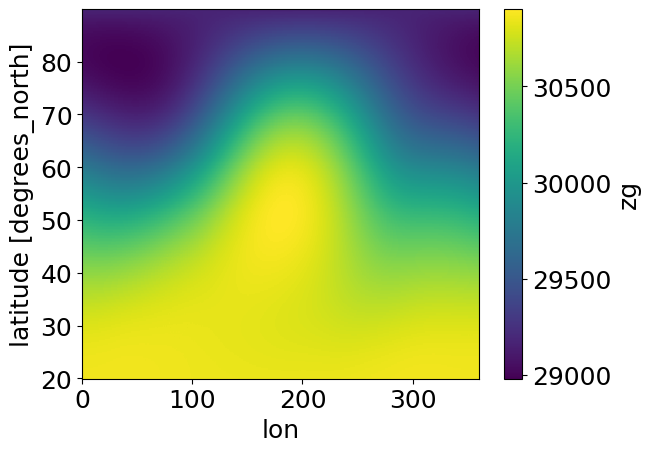

In [80]:
da_era.plot()

In [82]:
ds[d_var].squeeze()

<xarray.DataArray 'zg' (lat: 75, lon: 384)>
[28800 values with dtype=float32]
Coordinates:
    plev            float64 ...
  * lat             (lat) float64 20.1 21.04 21.97 22.91 ... 87.42 88.36 89.28
  * lon             (lon) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    dcpp_init_year  float64 ...

In [84]:
title_ls = [
            'CanESM2','CanESM5',
            'CESM2-LE','CNRM-CM6-1',
            'INM-CM5-0','IPSL-CM6A-LR',
            'MIROC6','UKESM1-0-LL',
            'MPI-ESM1-2-LR','MPI-ESM1-2-HR'
           ]


ls = []
for title in title_ls:
    
    inf = glob.glob(inpath+f'*{title}*.nc')[-1]
    print(inf)
    ds = xr.open_dataset(inf)
    for d_var in ds.data_vars.keys():
        temp = add_cyclic_point_to_dataset(ds[d_var].squeeze())
        ls.append(temp.interp_like(da_era))

#ls.append(da_era)
ds_all = xr.concat(ls, dim = 'model', coords='minimal')
ds_all['model'] = title_ls#+['ERA5']
#ds_all = add_cyclic_point_to_dataset(ds_all)
ds_all

/work/bd1022/b381258/CMIP6/gh10/CanESM2-CMIP5_zg@10_climatology_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.CanESM5.historical.day.gn_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CESM2-LE-CMIP6_Z3@10_climatology_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.CNRM-CM6-1.historical.day.gr_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.INM-CM5-0.historical.day.gr1_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.IPSL-CM6A-LR.historical.day.gr_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.MIROC6.historical.day.gn_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.UKESM1-0-LL.historical.day.gn_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/zg_day_MPI-ESM1-2-LR_historical_climatology_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.MPI-ESM1-2-HR.historical.day.gn_zg@10_1979-2014.nc


<xarray.DataArray 'zg' (model: 10, lat: 249, lon: 1281)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [29402.8087838 , 29402.76180723, 29402.71483066, ...,
         29402.90651353, 29402.85764866, 29402.8087838 ],
        ...,
        [30825.29364122, 30825.37705945, 30825.46047769, ...,
         30825.18156926, 30825.23760524, 30825.29364122],
        [30826.1078197 , 30826.21589222, 30826.32396475, ...,
         30825.97285448, 30826.04033709, 30826.1078197 ],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * lat      (lat) float64 89.78 89.51 89.23 88.95 ... 20.94 20.66 20.37 20.09
  * lon      (lon) float64 0.0 0.2812 0.5625 0.8438 ... 359.2 359.4 359.7 360.0
  * model    (model) <U13 'CanESM2' 'CanESM5' ... 'MPI-ESM1-2-HR'

In [74]:
da_era

<xarray.DataArray 'Z' (lat: 249, lon: 1280)>
array([[29163.129, 29163.117, 29163.111, ..., 29163.203, 29163.178, 29163.154],
       [29153.117, 29153.088, 29153.062, ..., 29153.27 , 29153.223, 29153.172],
       [29143.523, 29143.475, 29143.424, ..., 29143.742, 29143.67 , 29143.596],
       ...,
       [30858.293, 30858.268, 30858.291, ..., 30858.252, 30858.312, 30858.271],
       [30858.484, 30858.492, 30858.53 , ..., 30858.492, 30858.504, 30858.479],
       [30858.691, 30858.65 , 30858.691, ..., 30858.656, 30858.674, 30858.67 ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 0.2812 0.5625 0.8438 ... 358.9 359.2 359.4 359.7
  * lat      (lat) float64 89.78 89.51 89.23 88.95 ... 20.94 20.66 20.37 20.09
    plev     float64 1e+03

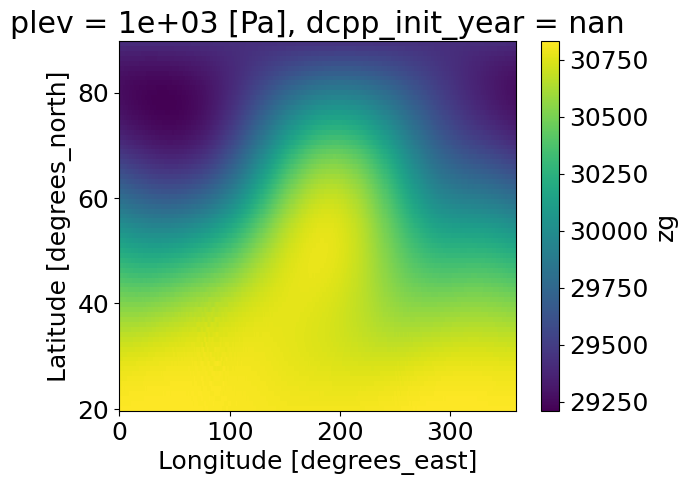

In [73]:
ds['zg'].plot()

In [59]:
add_cyclic_point(ds_all)

masked_array(
  data=[[[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            

In [ ]:
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set(title='Probability', xticks=[], yticks=[])

In [12]:
p.fig.add_axes()

array([[<GeoAxesSubplot:title={'center':'CanESM2'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
        <GeoAxesSubplot:title={'center':'CanESM5'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>],
       [<GeoAxesSubplot:title={'center':'CESM2-LE'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
        <GeoAxesSubplot:title={'center':'CNRM-CM6-1'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>],
       [<GeoAxesSubplot:title={'center':'INM-CM5-0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
        <GeoAxesSubplot:title={'center':'IPSL-CM6A-LR'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>],
       [<GeoAxesSubplot:title={'center':'MIROC6'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
        <GeoAxesSubplot:title={'center':'UKESM1-0-LL'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>]

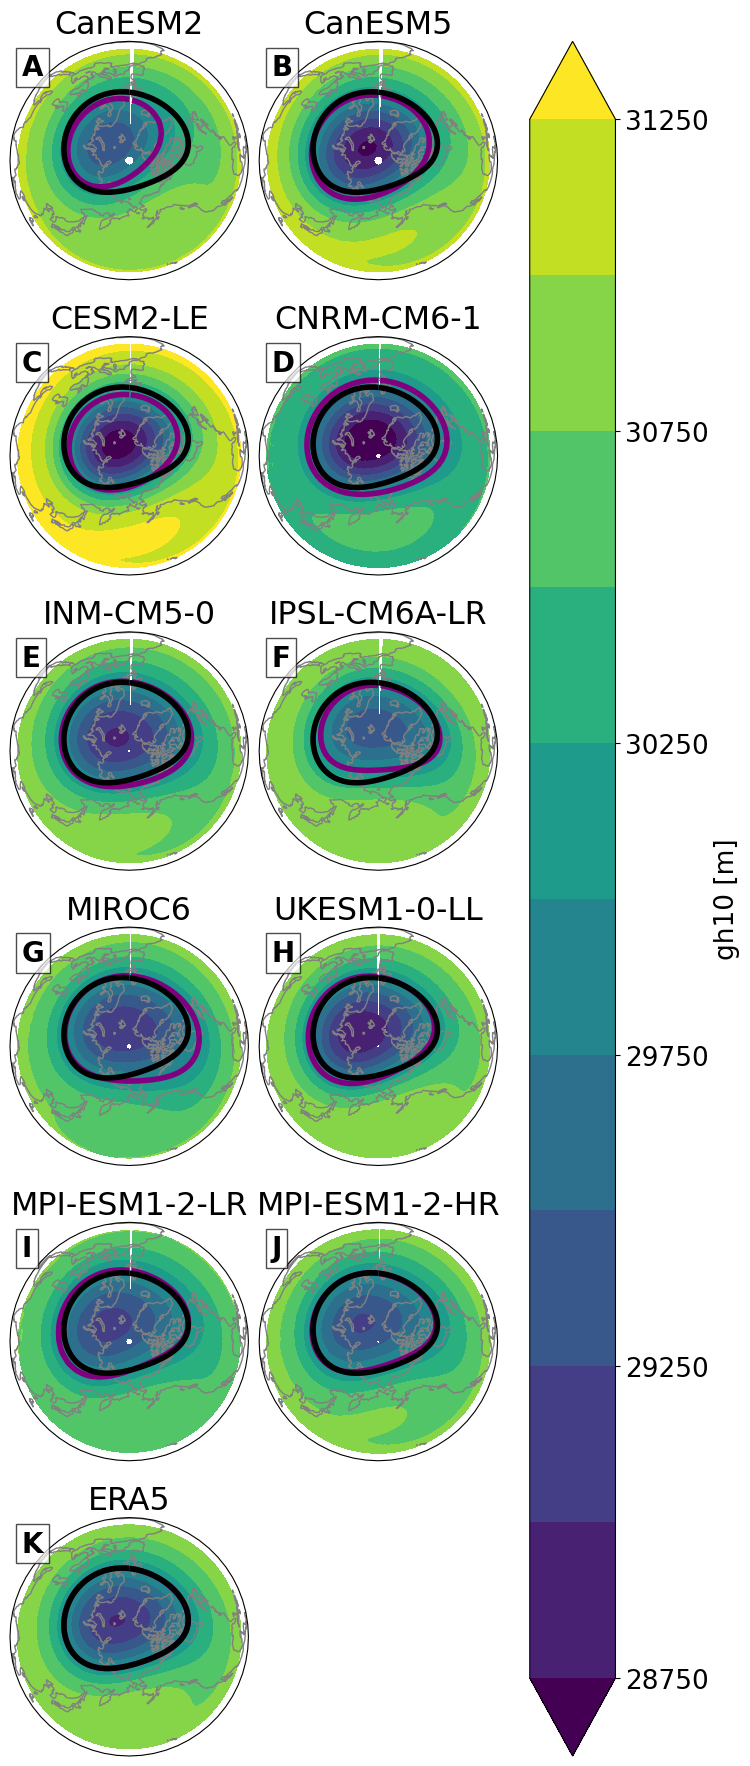

In [9]:
plt.rcParams.update({'font.size': 18, "contour.linewidth": 4})

p = ds_all.plot.contourf(
    levels = 13,
    col = 'model', col_wrap = 2,
    subplot_kws={"projection": ccrs.Orthographic(180, 90)},
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "gh10 [m]"},
    robust = True,
)
kwargs = dict(levels = [30000], colors = 'purple', add_colorbar=False, transform=ccrs.PlateCarree(),)
p.map_dataarray(xr.plot.contour, 'lon','lat', **kwargs)

for i, (ax, title) in enumerate(zip(p.axs.flat, title_ls+['ERA5'])):
    
    da_era.plot.contour(
            ax=ax, levels = [30000], colors = 'k',
            transform=ccrs.PlateCarree(),
    )
    ax.coastlines(color = 'gray')
    ax.set_title(title)
    
    ax.text(0.05, 0.95, ascii_uppercase[i], transform=ax.transAxes,
              fontsize=20, fontweight='bold', va='top', bbox={'alpha': 0.7, 'facecolor': 'white'})

plt.savefig('gh10_model_climatology_comparison.pdf', bbox_inches='tight')

In [35]:
temp_ax = p.axes[0,0]

/tmp/ipykernel_509016/1712267818.py:1: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  temp_ax = p.axes[0,0]


In [39]:
temp_ax.bbox.height, temp_ax.bbox.width

(240.26666666666665, 240.26666666666662)

In [45]:
temp_ax.get_position()

Bbox([[0.07616360650843405, 0.8036000000000001], [0.41940170174652924, 0.9637777777777778]])

In [65]:
def add_cyclic_point_to_dataset(data):
    # Generate data with cyclic point and generate longitude with cyclic point
    cyclic_data, cyclic_longitude = add_cyclic_point(data.values, coord=data['lon'])

    # Create new coords that will be used in creation of new dataset
    # Replicate coords of existing dataset and replace longitude with cyclic longitude
    coords = {dim: data.coords[dim] for dim in data.dims}
    coords["lon"] = cyclic_longitude

    new_da = xr.DataArray(cyclic_data, dims=data.dims, coords=coords)
    new_da.name = 'zg'
    return new_da

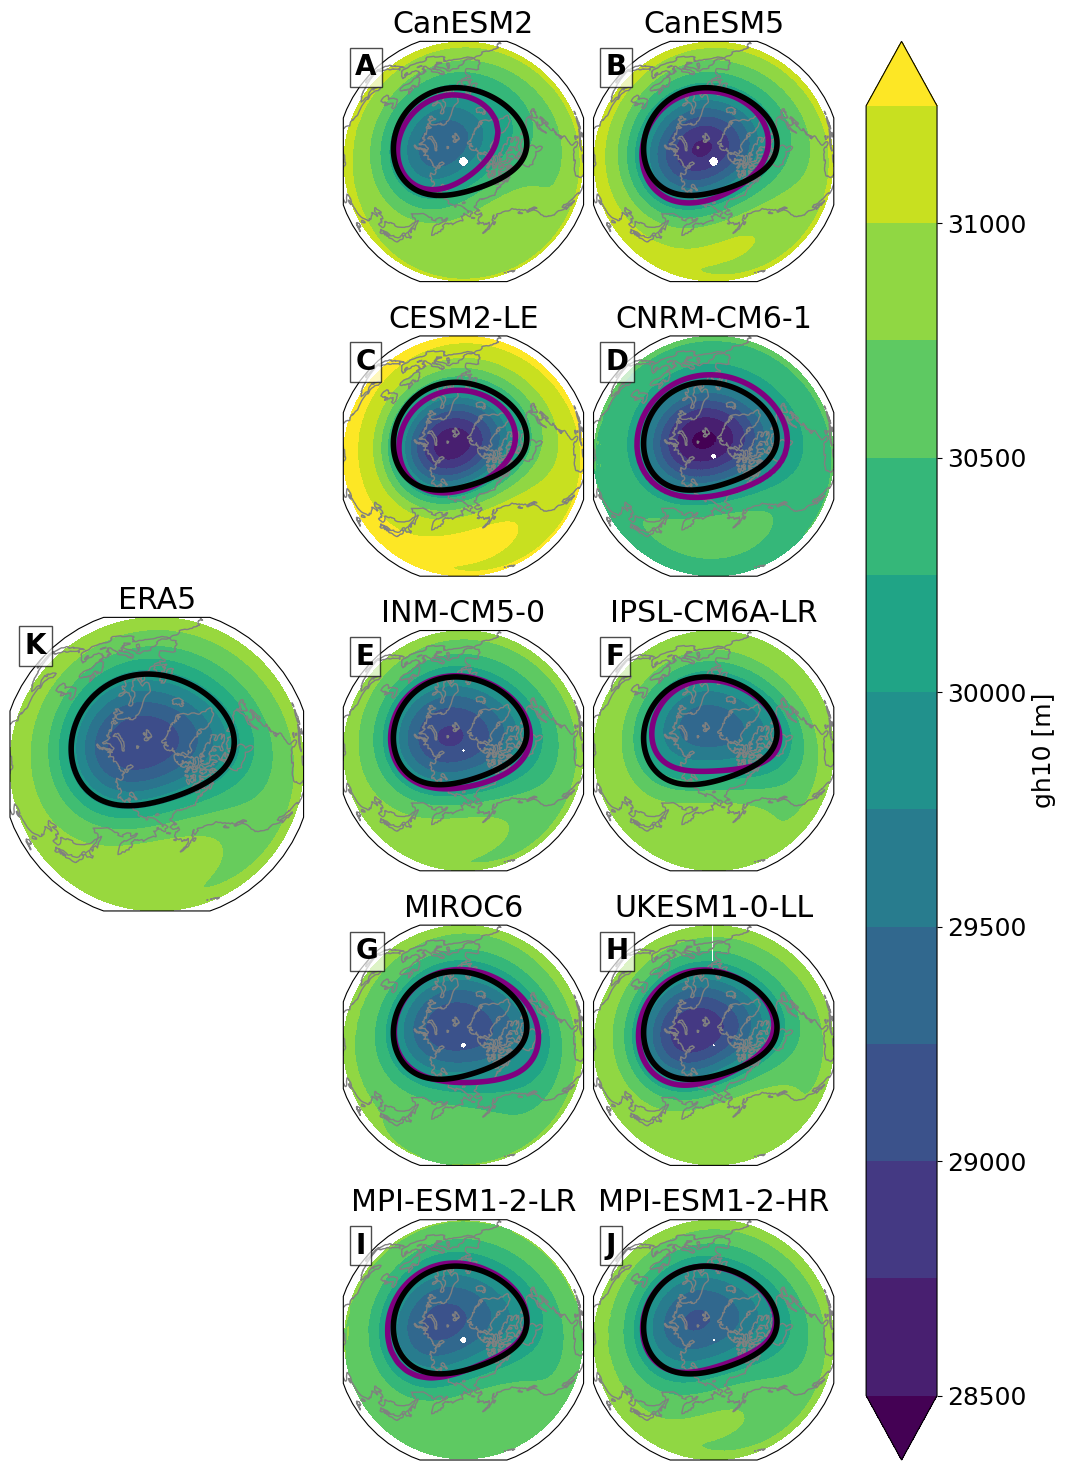

In [87]:
plt.rcParams.update({'font.size': 18, "contour.linewidth": 4})

p = ds_all.plot.contourf(
    levels = 13,
    col = 'model', col_wrap = 2,
    subplot_kws={"projection": ccrs.Orthographic(180, 90)},
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "gh10 [m]"},
    robust = True,
)
kwargs = dict(
    levels = [30000], 
    colors = 'purple', 
    add_colorbar=False, 
    transform=ccrs.PlateCarree()
)
p.map_dataarray(xr.plot.contour, 'lon','lat', **kwargs)

for i, (ax, title) in enumerate(zip(p.axs.flat, title_ls)):
    
    da_era.plot.contour(
            ax=ax, levels = [30000], colors = 'k',
            transform=ccrs.PlateCarree(),
    )
    ax.coastlines(color = 'gray')
    ax.set_title(title)
    
    ax.text(0.05, 0.95, ascii_uppercase[i], transform=ax.transAxes,
              fontsize=20, fontweight='bold', va='top', bbox={'alpha': 0.7, 'facecolor': 'white'})

right_inset_ax = p.fig.add_axes(
    [-0.4, 0, 0.41940170174652924, 0.9637777777777778], 
    projection = ccrs.Orthographic(180, 90),
    #aspect=1, size=3
)
vmax = p.cbar.vmax
vmin = p.cbar.vmin
da_era.plot.contourf(
    levels = 13,
    vmax=vmax,
    vmin=vmin,
    extend = 'both',    
    transform=ccrs.PlateCarree(),
    ax = right_inset_ax,
    add_colorbar = False,
)
da_era.plot.contour(
            ax=right_inset_ax, levels = [30000], colors = 'k',
            transform=ccrs.PlateCarree(),
    )
right_inset_ax.coastlines(color = 'gray')
right_inset_ax.set_title('ERA5')
right_inset_ax.text(0.05, 0.95, ascii_uppercase[i+1], transform=right_inset_ax.transAxes,
              fontsize=20, fontweight='bold', 
      va='top', bbox={'alpha': 0.7, 'facecolor': 'white'})

plt.savefig('gh10_model_climatology_comparison.pdf', bbox_inches='tight')

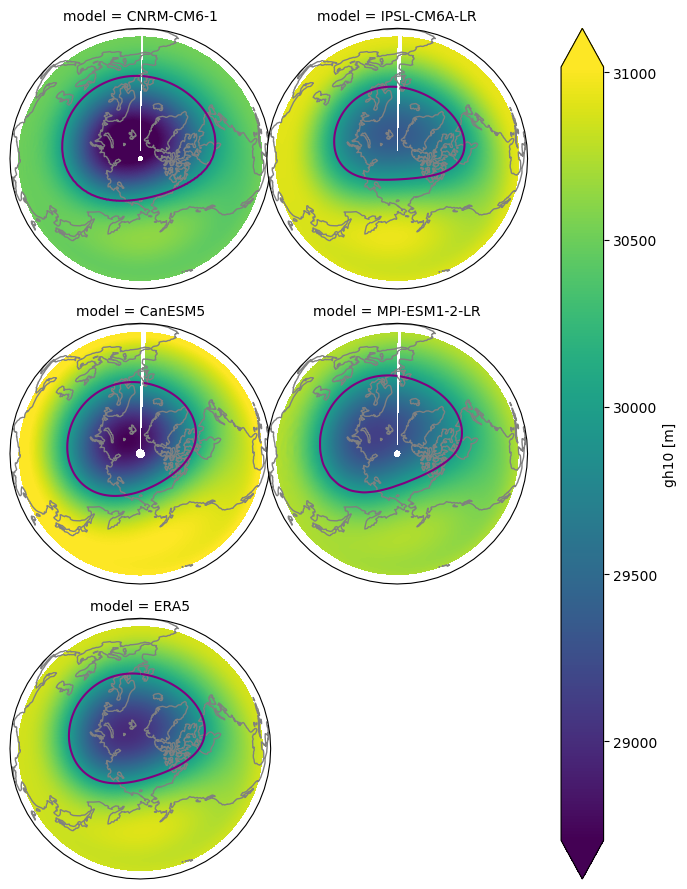

In [116]:
p = ds_all.plot(
    col = 'model', col_wrap = 2,
    subplot_kws={"projection": ccrs.Orthographic(180, 90)},
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "gh10 [m]"},
    robust = True,
)
kwargs = dict(levels = [30000], colors = 'purple', add_colorbar=False, transform=ccrs.PlateCarree(),)
p.map_dataarray(xr.plot.contour, 'lon','lat', **kwargs)

for ax in p.axs.flat:
    ax.coastlines(color = 'gray')
    #ax.gridlines()


/work/bd1022/b381258/CMIP6/gh10/CMIP.CNRM-CM6-1.historical.day.gr_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.IPSL-CM6A-LR.historical.day.gr_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/CMIP.CanESM5.historical.day.gn_zg@10_1979-2014.nc
/work/bd1022/b381258/CMIP6/gh10/zg_day_MPI-ESM1-2-LR_historical_climatology_1979-2014.nc


Text(0.5, 1.0, 'ERA5')

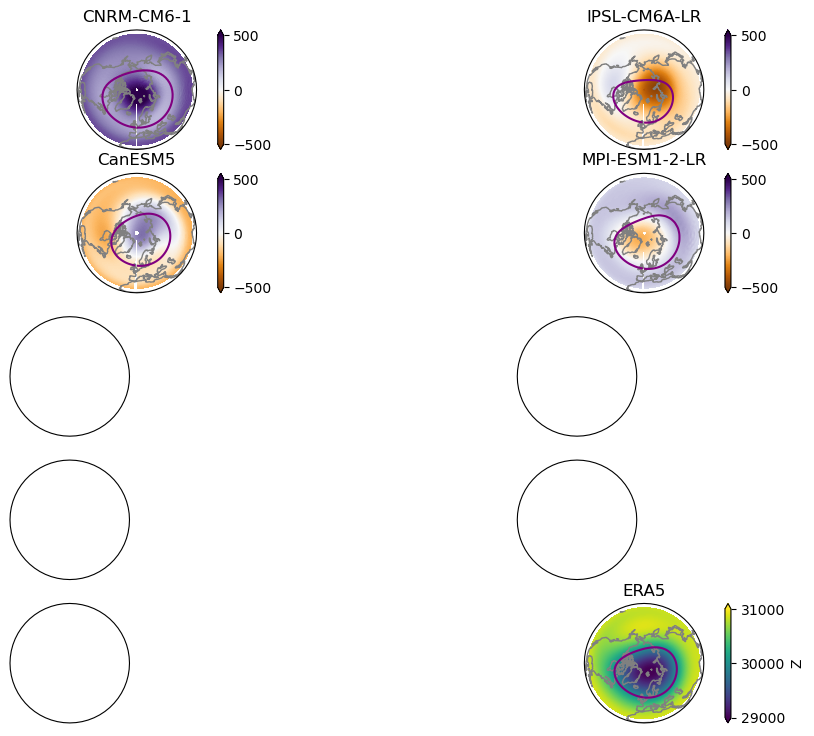

In [95]:
n_files = len(infile_ls)
vmax = 500
fig, axes = plt.subplots(
    5, 2, 
    subplot_kw={"projection": ccrs.Orthographic(0, 90)}, 
    sharey=True,
    sharex=True,
    figsize=(12,9)
)
for inf, ax, title in zip(infile_ls, axes.flatten() ,title_ls):
    print(inf)
    ds = xr.open_dataset(inf)
    for d_var in ds.data_vars.keys():
        diff = da_era-ds[d_var].interp_like(da_era)
        #ds[d_var]
        diff.plot(
            ax=ax, vmin = -vmax, vmax  = vmax, extend = 'both',
            cmap = 'PuOr',
            #add_colorbar = False,
            transform=ccrs.PlateCarree(),
        )
        ds[d_var].plot.contour(
            levels = [30000], colors = 'purple', ax = ax,
            transform=ccrs.PlateCarree(),
                              )
    ax.coastlines(color = 'gray')
    ax.set_title(title)
    #ax.gridlines()

ax = axes[-1,-1]
da_era.plot(
            ax=ax, vmin = 29000, vmax  = 31000, extend = 'both',
            #add_colorbar = False,
            transform=ccrs.PlateCarree(),
        )
da_era.plot.contour(
            ax=ax,  levels = [30000], colors = 'purple',
            #add_colorbar = False,
            transform=ccrs.PlateCarree(),
        )
ax.coastlines(color = 'gray')
ax.set_title('ERA5')
#ax.gridlines()